In [1]:
# First import
import os, sys
print("First import completed.")

# Second import
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

print("Second import completed.")

# Set config
# TEST_DIR = os.path.realpath(os.path.join(os.getcwd(), '..', 'test'))
DATA_DIR = 'D:\\Git Repository\\_local_data_\\DLW\\Orats\\'
# DATA_CLEAN_DIR = 'd:\\jupyter\\wooji\\repository\\Utils'

pd.set_option('display.max_rows', 500)
plt.style.use('seaborn')

# sys.path.append(TEST_DIR)
sys.path.append(DATA_DIR)
# sys.path.append(DATA_CLEAN_DIR)
print('Config all set.')

from read_option_data import *
from workers import *
# from anomaly_detection_helper import train_test_split
# import pickle
# import seaborn as sns
print("Third import completed.")


First import completed.
Second import completed.
Config all set.
Third import completed.


In [2]:
start_date = '20210524'
end_date = '20210810'
ticker = ['SPCE']
# optionsdata = readMultiDay(DATA_DIR, start_date, end_date, ticker=['TSLA'])


In [3]:
def expiry_contract(df, _expiry):
    """
    return expiry in current/next/3rd month filter
    """
    expiration, quotedate = df['expiration'], df['quotedate']
    timedelta = (expiration - quotedate).dt.days

    if _expiry == 'cur':
        return timedelta <= 30
    if _expiry == 'next':
        return timedelta <= 60 & timedelta >= 30
    if _expiry == 'third':
        return timedelta <= 90 & timedelta >= 60

In [12]:
def get_sum_optVolume(folder_path, start_date, end_date, ticker, expiry_period = 'cur'):
    
    dateList = [d.strftime('%Y%m%d') for d in pd.date_range(start_date, end_date)]
    volume_list = []
    for d in dateList:
        try:
            df = cleanDF(readDayCsv(folder_path, d), ticker)
            v = df[expiry_contract(df, expiry_period) & abs(df.delta) >= 0.6]['volume'].sum()
            volume_list.append(v)
        except:
            print(f'{d} is not a trading day.')
    
    return volume_list

In [13]:
option_volume = get_sum_optVolume(DATA_DIR, start_date, end_date, ticker, expiry_period = 'cur')

20210529 is not a trading day.
20210530 is not a trading day.
20210531 is not a trading day.
20210605 is not a trading day.
20210606 is not a trading day.
20210612 is not a trading day.
20210613 is not a trading day.
20210619 is not a trading day.
20210620 is not a trading day.
20210626 is not a trading day.
20210627 is not a trading day.
20210703 is not a trading day.
20210704 is not a trading day.
20210705 is not a trading day.
20210710 is not a trading day.
20210711 is not a trading day.
20210717 is not a trading day.
20210718 is not a trading day.
20210724 is not a trading day.
20210725 is not a trading day.
20210731 is not a trading day.
20210801 is not a trading day.
20210807 is not a trading day.
20210808 is not a trading day.
20210809 is not a trading day.


In [6]:
stock_df = get_all_price(['SPCE'], '2021-05-24', '2021-08-11')

[*********************100%***********************]  1 of 1 completed


In [7]:
stock_volume = stock_df.volume.to_list()

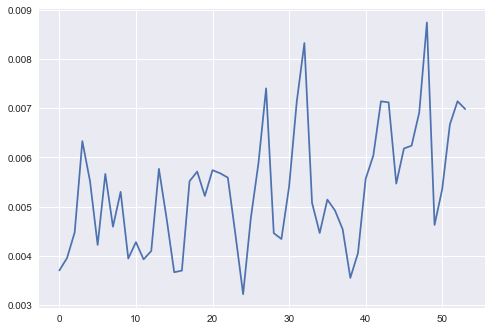

In [11]:
plt.plot([x/y for x, y in zip(option_volume, stock_volume)])

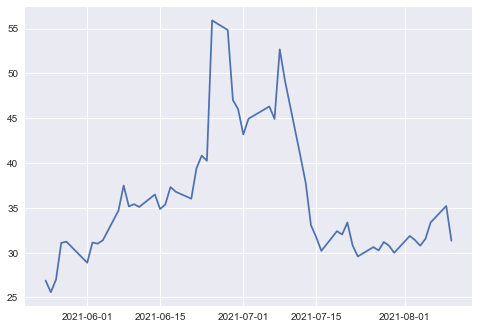

In [9]:
plt.plot(stock_df.close)